# Exercises: Data Analysis with Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Radon Decay
The decay of Radon 220 is investigated with an ionisation chamber. The chamber delivers an electrical signal which is proportional to the activity of the radioactive gas in the detector. The time and voltage data for a measurement over 5 minutes can be read from a csv file.

In [3]:
decay = np.genfromtxt('data/radon.csv', delimiter=',')
time = decay[0]
voltage = decay[1]

Graph the voltage vs time diagram.

Text(0, 0.5, 'voltage (V)')

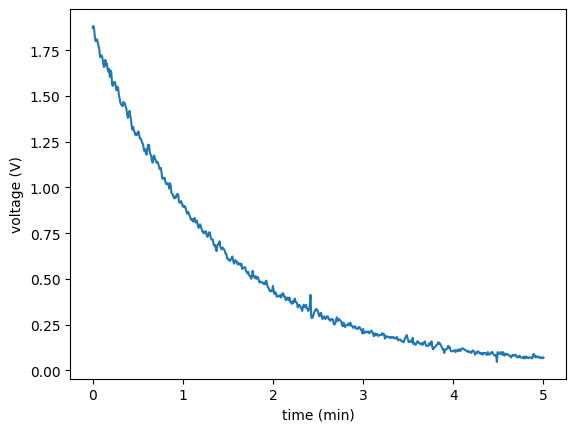

In [4]:
plt.plot(time, voltage)
plt.xlabel('time (min)')
plt.ylabel('voltage (V)')

The theory predicts an exponential decay. Visually verify the model with an exponential fit function. Include a term for a possible (constant) voltage offset.

In [ ]:
from scipy.optimize import curve_fit

def f(t, V0, tau, offset):
    return V0 * np.exp(-t/tau) + offset

coeff, pcov = curve_fit(f, time, voltage)
V0, tau, offset = coeff

v_exp = f(time, V0, tau, offset)

plt.plot(time, voltage)
plt.plot(time, v_exp)

In [ ]:
print('The fit parameters are:')
print(f'initial voltage: V0 = {V0:.2f} V')
print(f'time constant:   tau = {tau:.2f} min = {tau*60:.1f} s')
Th = tau * np.log(2)
print(f'half-life:       T1/2 = {Th:.2f} min = {Th*60:.1f} s')
print(f'voltage offset:  offset = {1000*offset:.1f} mV')

Determine the error of the time constant in two different ways: Using the covariance matrix for the fit function, and by determining the deviation for fits to different time intervals.

In [ ]:
errors = np.sqrt(np.diag(pcov))
dtau1 = errors[1]

n_trials = 500
low, high = 0, len(time)
threshold = len(time)/2
tau_array = np.zeros(n_trials)

rng = np.random.default_rng()

for i in range(n_trials):
    while True:
        a, b = rng.integers(low=low, high=high, size=2)
        if a < b and b - a > threshold:
            break
    t_subset = time[a:b]
    v_subset = voltage[a:b]
    c, p = curve_fit(f, t_subset, v_subset, p0=[v_subset[0], tau, 0])
    tau_array[i] = c[1]

dtau2 = (np.max(tau_array) - np.min(tau_array))/2

print(f'error of fit parameter: dtau = {dtau1*60:.2f} s')
print(f'error using {n_trials} time intervals: dtau = {dtau2*60:.1f} s')

Considering that the expected value for the half-life of Radon 220 is 55.6 s (corresponds to a time constant of 80.2 s), the error based on different time intervals looks more realistic. The result of the second method is highly sensitive to the minimum time interval (parameter threshold). If the threshold is too small, small fluctuations in the signal can have a great impact on the fit function.